### 1. MNIST 다중분류

#### 1.1 데이터로드

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 1.2 데이터 확인

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

digit = train_images[100]
label = train_labels[100]

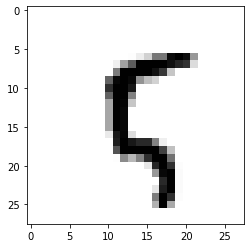

In [8]:
plt.imshow(digit, cmap = plt.cm.binary) # plt.cm.binary  ->  색깔을 흑백으로 나타냄
plt.show()

In [9]:
label

5

### 1.3 전처리

In [10]:
train_images = train_images.reshape(60000, 28 * 28)

In [11]:
# rgb 픽셀값 255 로 나눠서 0과 1로 만들어주기
train_images = train_images.astype('float32') / 255

In [12]:
test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255

In [13]:
# 원핫인코딩

from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
train_labels_one = to_categorical(train_labels)
test_labels_one = to_categorical(test_labels)

In [15]:
train_labels_one.shape, test_labels_one.shape

((60000, 10), (10000, 10))

### 1.4 모델 설계

In [16]:
model3 = Sequential()
model3.add(Dense(512, activation = 'relu', input_dim = 784))
model3.add(Dense(10, activation = 'softmax'))

In [17]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [18]:
model3.fit(train_images, train_labels_one, epochs = 10, batch_size = 84)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.2387 - accuracy: 0.9322
Epoch 2/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0957 - accuracy: 0.9717
Epoch 3/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0600 - accuracy: 0.9823
Epoch 4/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0428 - accuracy: 0.9872
Epoch 5/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0315 - accuracy: 0.9902
Epoch 6/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0217 - accuracy: 0.9937
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0186 - accuracy: 0.9947
Epoch 8/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0143 - accuracy: 0.9959
Epoch 9/10
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0100 - accuracy: 0.9971
Epoch 10/10
60

### 평가하기

In [19]:
model3.evaluate(test_images, test_labels_one)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.0723 - accuracy: 0.9821


[0.0723063759796285, 0.9821]

In [20]:
model3.predict([test_images[0:1]])

array([[1.8388067e-11, 5.0504463e-13, 1.4148903e-09, 7.7333874e-07,
        1.4221704e-14, 5.1960589e-12, 5.9716981e-17, 9.9999928e-01,
        2.1102299e-11, 3.7880049e-08]], dtype=float32)